In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\FREELANCE_PROJECTS\Mental-Health-Prediction-ML\data\survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [184]:
data.shape

(1259, 27)

In [185]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [186]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [187]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Percentage (%)", ascending=False)

missing_data_summary

,Missing Values,Percentage (%)
comments,1095,86.973789
state,515,40.905481
work_interfere,264,20.969023
self_employed,18,1.429706
Gender,0,0.000000
Timestamp,0,0.000000
Age,0,0.000000
family_history,0,0.000000
treatment,0,0.000000
no_employees,0,0.000000


In [188]:
important_columns = [
    "Age", "Gender", "self_employed", "family_history", "work_interfere",
    "no_employees", "tech_company", "benefits",
    "leave","treatment", "remote_work", "mental_health_consequence", "phys_health_consequence", "mental_health_interview"
]

filtered_data = data[important_columns]

In [189]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,treatment,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,37,Female,NaN,No,Often,6-25,Yes,Yes,Somewhat easy,Yes,No,No,No,No
1,44,M,NaN,No,Rarely,More than 1000,No,Don't know,Don't know,No,No,Maybe,No,No
2,32,Male,NaN,No,Rarely,6-25,Yes,No,Somewhat difficult,No,No,No,No,Yes
3,31,Male,NaN,Yes,Often,26-100,Yes,No,Somewhat difficult,Yes,No,Yes,Yes,Maybe
4,31,Male,NaN,No,Never,100-500,Yes,Yes,Don't know,No,Yes,No,No,Yes


In [190]:
filtered_data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
work_interfere               264
no_employees                   0
tech_company                   0
benefits                       0
leave                          0
treatment                      0
remote_work                    0
mental_health_consequence      0
phys_health_consequence        0
mental_health_interview        0
dtype: int64

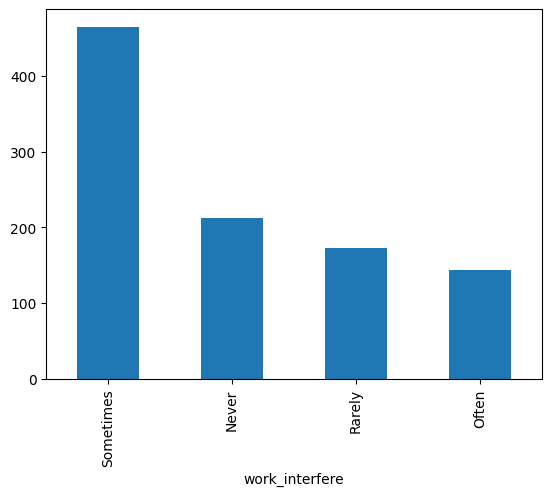

In [191]:
filtered_data["work_interfere"].value_counts().plot.bar();

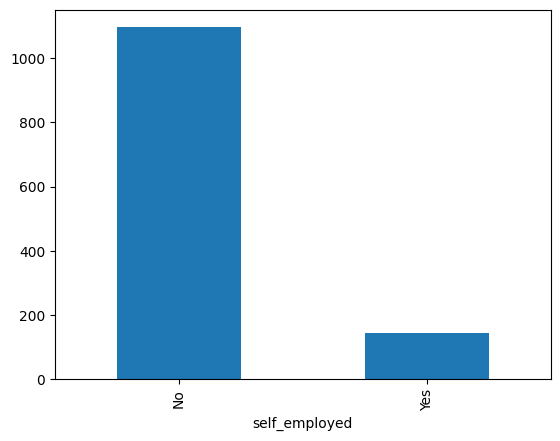

In [192]:
filtered_data["self_employed"].value_counts().plot.bar();

In [193]:
filtered_data["work_interfere"] = filtered_data["work_interfere"].fillna("Sometimes")
filtered_data["self_employed"] = filtered_data["self_employed"].fillna("No")

In [194]:
categorical_columns = filtered_data.select_dtypes(include=["object"]).columns
numeric_columns = filtered_data.select_dtypes(include=["int64", "float64"]).columns

In [195]:
categorical_columns

Index(['Gender', 'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'tech_company', 'benefits', 'leave', 'treatment',
       'remote_work', 'mental_health_consequence', 'phys_health_consequence',
       'mental_health_interview'],
      dtype='object')

In [196]:
numeric_columns

Index(['Age'], dtype='object')

In [197]:
for i in categorical_columns:
    feature = filtered_data[i].unique()
    print(f"{i}: ", feature)
    print('--------------------------------')

Gender:  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
--------------------------------
self_employed:  ['No' 'Yes']
--------------------------------
family_history:  ['No' 'Yes']
--------------------------------
work_interfere:  ['Often' 'Rarely' 'Never' 'Sometimes']
--------------------------------
no_employees:  ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
--------------------------------
tech_company:  ['Yes' 'No']
--------------------------------
benefits:  ['Ye

In [198]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,treatment,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,37,Female,No,No,Often,6-25,Yes,Yes,Somewhat easy,Yes,No,No,No,No
1,44,M,No,No,Rarely,More than 1000,No,Don't know,Don't know,No,No,Maybe,No,No
2,32,Male,No,No,Rarely,6-25,Yes,No,Somewhat difficult,No,No,No,No,Yes
3,31,Male,No,Yes,Often,26-100,Yes,No,Somewhat difficult,Yes,No,Yes,Yes,Maybe
4,31,Male,No,No,Never,100-500,Yes,Yes,Don't know,No,Yes,No,No,Yes


In [199]:
def handle_gender(gender):
    if gender == 'Male':
        return 1
    elif gender == 'male':
        return 1
    elif gender == 'female':
        return 0
    else:
        return 0

filtered_data["Gender"] = filtered_data["Gender"].apply(handle_gender)

In [200]:
def handle_no_employees(no_employees):
    if no_employees == '1-5':
        return 0
    elif no_employees == '6-25':
        return 1
    elif no_employees == '26-100':
        return 2
    elif no_employees == '500-1000':
        return 3    
    elif no_employees == 'More than 1000':
        return 4 

filtered_data["no_employees"] = filtered_data["no_employees"].apply(handle_gender)

In [201]:
def handle_mental_health_consequence(mental_health_consequence):
    if mental_health_consequence == 'No':
        return 0
    elif mental_health_consequence == 'Yes':
        return 1
    else:
        return 2

filtered_data["mental_health_consequence"] = filtered_data["mental_health_consequence"].apply(handle_mental_health_consequence)

filtered_data["phys_health_consequence"] = filtered_data["phys_health_consequence"].apply(handle_mental_health_consequence)

filtered_data["mental_health_interview"] = filtered_data["mental_health_interview"].apply(handle_mental_health_consequence)

In [202]:
filtered_data["mental_health_consequence"].value_counts()

mental_health_consequence
0    490
2    477
1    292
Name: count, dtype: int64

In [203]:
filtered_data["phys_health_consequence"].value_counts()

phys_health_consequence
0    925
2    273
1     61
Name: count, dtype: int64

In [204]:
filtered_data["mental_health_interview"].value_counts()

mental_health_interview
0    1008
2     207
1      44
Name: count, dtype: int64

In [205]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,treatment,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,37,0,No,No,Often,0,Yes,Yes,Somewhat easy,Yes,No,0,0,0
1,44,0,No,No,Rarely,0,No,Don't know,Don't know,No,No,2,0,0
2,32,1,No,No,Rarely,0,Yes,No,Somewhat difficult,No,No,0,0,1
3,31,1,No,Yes,Often,0,Yes,No,Somewhat difficult,Yes,No,1,1,2
4,31,1,No,No,Never,0,Yes,Yes,Don't know,No,Yes,0,0,1


In [206]:
data["treatment"].value_counts()

treatment
Yes    637
No     622
Name: count, dtype: int64

In [207]:
print(filtered_data["self_employed"].unique())
print(filtered_data["family_history"].unique())
print(filtered_data["work_interfere"].unique())
print(filtered_data["tech_company"].unique())
print(filtered_data["benefits"].unique())
print(filtered_data["remote_work"].unique())
print(filtered_data["leave"].unique())

['No' 'Yes']
['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes']
['Yes' 'No']
['Yes' "Don't know" 'No']
['No' 'Yes']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']


In [208]:
X = filtered_data.drop("treatment", axis=1)
y = filtered_data["treatment"].apply(lambda x: 1 if x == "Yes" else 0)

In [209]:
X.to_csv('X.csv')

In [210]:
X.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,37,0,No,No,Often,0,Yes,Yes,Somewhat easy,No,0,0,0
1,44,0,No,No,Rarely,0,No,Don't know,Don't know,No,2,0,0
2,32,1,No,No,Rarely,0,Yes,No,Somewhat difficult,No,0,0,1
3,31,1,No,Yes,Often,0,Yes,No,Somewhat difficult,No,1,1,2
4,31,1,No,No,Never,0,Yes,Yes,Don't know,Yes,0,0,1


In [211]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [212]:
X.head()

,Age,Gender,no_employees,mental_health_consequence,phys_health_consequence,mental_health_interview,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,tech_company_Yes,benefits_No,benefits_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,remote_work_Yes
0,37,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1,44,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,32,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0
3,31,1,0,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,0
4,31,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(accuracy)


0.7553613979348689


In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)
y_pred = rf.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Random Forest Accuracy: ", accuracy)


Random Forest Accuracy:  0.9944400317712471


In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)
y_train = np.array(y_train).astype(np.int64)
y_test = np.array(y_test).astype(np.int64)

In [217]:
from sklearn.naive_bayes import GaussianNB

pnn = GaussianNB()
pnn.fit(X_train, y_train)
pnn_pred = pnn.predict(X_test)
pnn_accuracy = accuracy_score(y_test, pnn_pred)
print(f"PNN accuracy: {pnn_accuracy}")

PNN accuracy: 0.5119047619047619


In [218]:
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


input_size = X_train.shape[1]
hidden_size = 16
output_size = 2

model = RNNClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train).unsqueeze(1)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test).unsqueeze(1)
y_test_tensor = torch.tensor(y_test)

epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    rnn_pred = model(X_test_tensor)
    _, predicted = torch.max(rnn_pred, 1)
    rnn_accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
print(f"RNN accuracy: {rnn_accuracy}")

Epoch [5/20], Loss: 0.9630
Epoch [10/20], Loss: 0.8966
Epoch [15/20], Loss: 0.8364
Epoch [20/20], Loss: 0.7852
RNN accuracy: 0.48412698412698413
